# Mushroom Classification Dataset Analysis

## Project Overview
This notebook analyzes the **Mushroom Classification Dataset** from Kaggle (UCI) to verify if it meets the following requirements:
- **Minimum Features**: 12
- **Minimum Instances**: 500
- **Classification Type**: Binary or Multi-class

## Dataset Information
- **Source**: Kaggle (UCI Machine Learning Repository)
- **Dataset**: `uciml/mushroom-classification`
- **Objective**: Determine if the dataset is suitable for multiple classification models

## 1. Import Required Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/mac/github/Multiple-Classification-Models/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ All libraries imported successfully!


## 2. Download Dataset from Kaggle

In [2]:
# Download latest version of the Mushroom Classification dataset
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("="*70)
print("MUSHROOM CLASSIFICATION DATASET - KAGGLE")
print("="*70)
print(f"\n✓ Path to dataset files: {path}")

# List files in the directory
print("\nFiles in dataset directory:")
for file in os.listdir(path):
    print(f"  - {file}")

100%|██████████| 34.2k/34.2k [00:00<00:00, 397kB/s]

Extracting files...


MUSHROOM CLASSIFICATION DATASET - KAGGLE

✓ Path to dataset files: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1

Files in dataset directory:
  - mushrooms.csv


## 3. Load and Explore the Dataset

In [3]:
# Find and load the CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    print(f"Loading dataset from: {csv_file}")
    df = pd.read_csv(csv_file)
    print(f"\n✓ Dataset loaded successfully!")
else:
    print("✗ No CSV file found!")

Loading dataset from: /Users/mac/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1/mushrooms.csv

✓ Dataset loaded successfully!


In [4]:
# Display first few rows
print("="*70)
print("DATASET PREVIEW")
print("="*70)
df.head(10)

DATASET PREVIEW


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


## 4. Dataset Shape and Requirements Verification

In [7]:
print("="*70)
print("REQUIREMENT VERIFICATION")
print("="*70)

# Dataset shape
print(f"\n1. DATASET SHAPE:")
print(f"   Rows (Instances): {df.shape[0]}")
print(f"   Columns (Features): {df.shape[1]}")

REQUIREMENT VERIFICATION

1. DATASET SHAPE:
   Rows (Instances): 8124
   Columns (Features): 23


## 5. Feature Information and Data Types

In [8]:
print("="*70)
print("FEATURE INFORMATION")
print("="*70)

print(f"\nTotal Features: {len(df.columns)}")
print("\nFeature Details:")
print("-" * 70)

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    unique_vals = df[col].nunique()
    sample_vals = df[col].unique()[:5]
    print(f"{i:2d}. {col:20s} | Type: {str(dtype):10s} | Unique: {unique_vals:4d} | Sample: {sample_vals}")

FEATURE INFORMATION

Total Features: 23

Feature Details:
----------------------------------------------------------------------
 1. class                | Type: object     | Unique:    2 | Sample: ['p' 'e']
 2. cap-shape            | Type: object     | Unique:    6 | Sample: ['x' 'b' 's' 'f' 'k']
 3. cap-surface          | Type: object     | Unique:    4 | Sample: ['s' 'y' 'f' 'g']
 4. cap-color            | Type: object     | Unique:   10 | Sample: ['n' 'y' 'w' 'g' 'e']
 5. bruises              | Type: object     | Unique:    2 | Sample: ['t' 'f']
 6. odor                 | Type: object     | Unique:    9 | Sample: ['p' 'a' 'l' 'n' 'f']
 7. gill-attachment      | Type: object     | Unique:    2 | Sample: ['f' 'a']
 8. gill-spacing         | Type: object     | Unique:    2 | Sample: ['c' 'w']
 9. gill-size            | Type: object     | Unique:    2 | Sample: ['n' 'b']
10. gill-color           | Type: object     | Unique:   12 | Sample: ['k' 'n' 'g' 'p' 'w']
11. stalk-shape          

## 6. Classification Type Analysis

In [9]:
print("="*70)
print("CLASSIFICATION TYPE ANALYSIS")
print("="*70)

# Assuming first column is the target variable
target_col = df.columns[0]
unique_classes = df[target_col].nunique()

print(f"\nTarget Variable: '{target_col}'")
print(f"Unique Classes: {unique_classes}")
print(f"Classification Type: {'Binary Classification' if unique_classes == 2 else 'Multi-class Classification'}")
print(f"\nClasses: {sorted(df[target_col].unique())}")

# Class distribution
print(f"\nClass Distribution:")
print("-" * 50)
class_counts = df[target_col].value_counts()
for cls, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {cls}: {count:6d} ({percentage:5.2f}%)")

CLASSIFICATION TYPE ANALYSIS

Target Variable: 'class'
Unique Classes: 2
Classification Type: Binary Classification

Classes: ['e', 'p']

Class Distribution:
--------------------------------------------------
  e:   4208 (51.80%)
  p:   3916 (48.20%)


## 7. Data Quality Check

In [11]:
print("="*70)
print("DATA QUALITY CHECK")
print("="*70)

# Missing values
print("\n1. MISSING VALUES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✓ No missing values found!")
else:
    print("   Missing values detected:")
    for col, count in missing[missing > 0].items():
        print(f"   - {col}: {count}")

# Duplicate rows
print("\n2. DUPLICATE ROWS:")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print("   ✓ No duplicate rows found!")
else:
    print(f"   ✗ {duplicates} duplicate rows found")

DATA QUALITY CHECK

1. MISSING VALUES:
   ✓ No missing values found!

2. DUPLICATE ROWS:
   ✓ No duplicate rows found!


## 8. Visualizations

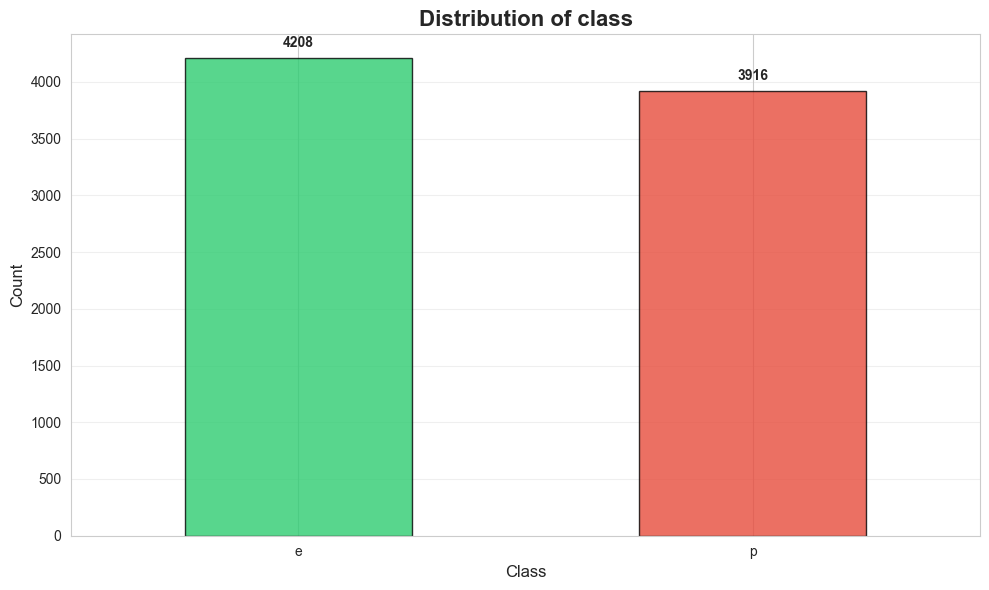


✓ Class distribution visualization created!


In [12]:
# Class Distribution Bar Chart
plt.figure(figsize=(10, 6))
class_counts = df[target_col].value_counts()
colors = ['#2ecc71', '#e74c3c'] if len(class_counts) == 2 else plt.cm.Set3(range(len(class_counts)))
class_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.8)
plt.title(f'Distribution of {target_col}', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(class_counts):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Class distribution visualization created!")

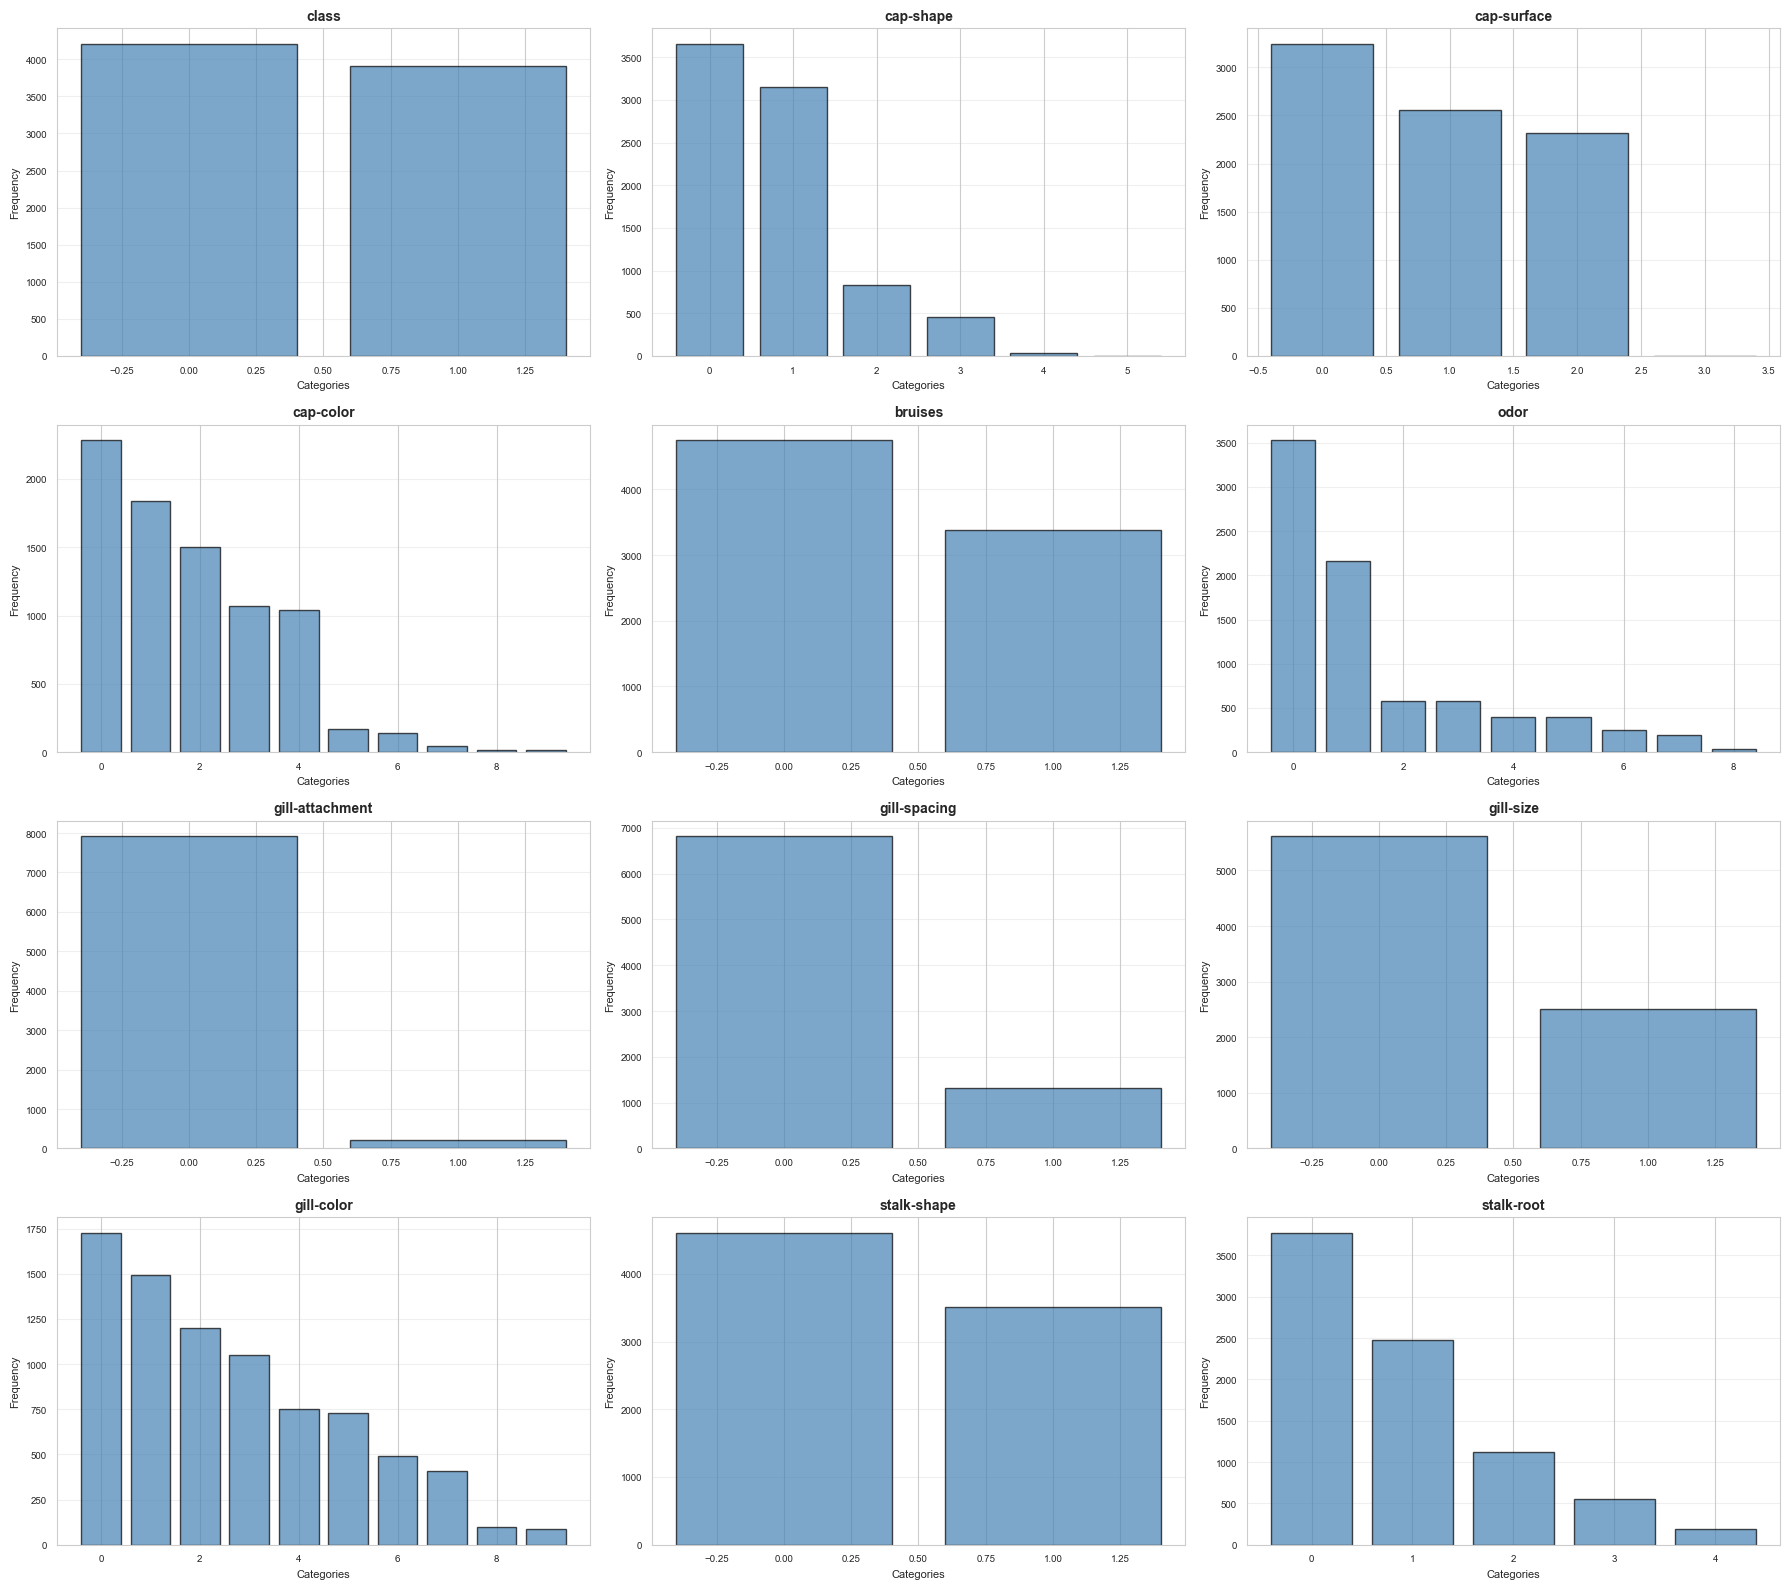


✓ Feature distribution visualizations created!


In [13]:
# Feature Value Distribution (for categorical features)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:12]):
    if idx < len(axes):
        value_counts = df[col].value_counts().head(10)
        axes[idx].bar(range(len(value_counts)), value_counts.values, 
                     color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontweight='bold', fontsize=10)
        axes[idx].set_xlabel('Categories', fontsize=8)
        axes[idx].set_ylabel('Frequency', fontsize=8)
        axes[idx].tick_params(labelsize=7)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Feature distribution visualizations created!")

## 9. Statistical Summary

In [14]:
print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)

# For categorical data, show value counts
print("\nValue counts for each feature:")
print("-" * 70)

for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

STATISTICAL SUMMARY

Value counts for each feature:
----------------------------------------------------------------------

class:
class
e    4208
p    3916
Name: count, dtype: int64

cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
Name: count, dtype: int64

cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
Name: count, dtype: int64

bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

odor:
odor
n    3528
f    2160
s     576
y     576
a     400
Name: count, dtype: int64

gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
Name: count, dtype: int64

stalk-shape:
stalk-shape
t    4608
e    3516
Name: cou

## 10. Final Summary and Recommendations

In [16]:
print("="*70)
print("FINAL SUMMARY - MUSHROOM CLASSIFICATION DATASET")
print("="*70)

print(f"\n📊 DATASET SPECIFICATIONS:")
print(f"   • Source: Kaggle (UCI Machine Learning Repository)")
print(f"   • Dataset: uciml/mushroom-classification")
print(f"   • Instances: {df.shape[0]}")
print(f"   • Features: {df.shape[1]}")
print(f"   • Target Variable: {target_col}")
print(f"   • Classification Type: {'Binary' if unique_classes == 2 else 'Multi-class'} ({unique_classes} classes)")

FINAL SUMMARY - MUSHROOM CLASSIFICATION DATASET

📊 DATASET SPECIFICATIONS:
   • Source: Kaggle (UCI Machine Learning Repository)
   • Dataset: uciml/mushroom-classification
   • Instances: 8124
   • Features: 23
   • Target Variable: class
   • Classification Type: Binary (2 classes)
